In [1]:
! pip install jamo
! pip install tqdm
! pip install Pillow
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import math
import json
import random
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
from jamo import h2j, j2hcj
from tqdm import tqdm
from pprint import pprint

In [2]:
#좌표 세팅

kb = 'ㅣㆍㅡㄱㅋㄴㄹㄷㅌㅂㅍㅅㅎㅈㅊㅇㅁ'

coords = {
    0: (0, 0),
    1: (72, 0),
    2: (144, 0),
    3: (0, 33),
    4: (0, 33),
    5: (72, 33),
    6: (72, 33),
    7: (144, 33),
    8: (144, 33),
    9: (0, 66),
    10: (0, 66),
    11:(72,66),
    12:(72,66),
    13:(144,66),
    14:(144,66),
    15:(72,99),
    16:(72,99)
}

print(len(kb))

17


In [3]:
#키 사이의 거리 계산

def distance(first, second):
    return math.hypot(second[0] - first[0], second[1] - first[1])

# test
print(distance(coords[0], coords[0]))
print(distance(coords[0], coords[9]))

0.0
66.0


In [4]:
keys_per_finger = [[0,1,3,4,5,6,9,10],[2,7,8,11,12,13,14,15,16]]
KEY_WIDTH = 216

distances = {i: {} for i in range(17)}

for keys in keys_per_finger:
    for i in keys:
        for j in keys:
            distances[i][j] = distance(coords[i], coords[j]) / KEY_WIDTH

distances

{0: {0: 0.0,
  1: 0.3333333333333333,
  3: 0.1527777777777778,
  4: 0.1527777777777778,
  5: 0.3666771884012246,
  6: 0.3666771884012246,
  9: 0.3055555555555556,
  10: 0.3055555555555556},
 1: {0: 0.3333333333333333,
  1: 0.0,
  3: 0.3666771884012246,
  4: 0.3666771884012246,
  5: 0.1527777777777778,
  6: 0.1527777777777778,
  9: 0.45218946100276963,
  10: 0.45218946100276963},
 2: {2: 0.0,
  7: 0.1527777777777778,
  8: 0.1527777777777778,
  11: 0.45218946100276963,
  12: 0.45218946100276963,
  13: 0.3055555555555556,
  14: 0.3055555555555556,
  15: 0.5667279378639768,
  16: 0.5667279378639768},
 3: {0: 0.1527777777777778,
  1: 0.3666771884012246,
  3: 0.0,
  4: 0.0,
  5: 0.3333333333333333,
  6: 0.3333333333333333,
  9: 0.1527777777777778,
  10: 0.1527777777777778},
 4: {0: 0.1527777777777778,
  1: 0.3666771884012246,
  3: 0.0,
  4: 0.0,
  5: 0.3333333333333333,
  6: 0.3333333333333333,
  9: 0.1527777777777778,
  10: 0.1527777777777778},
 5: {0: 0.3666771884012246,
  1: 0.15277777777

In [5]:
# 손가락 초기 위치 설정

home_key_pos = [3,7]

home_keys = {}
for i, keys in enumerate(keys_per_finger):
    for key in keys:
        home_keys[key] = home_key_pos[i]

home_keys

{0: 3,
 1: 3,
 3: 3,
 4: 3,
 5: 3,
 6: 3,
 9: 3,
 10: 3,
 2: 7,
 7: 7,
 8: 7,
 11: 7,
 12: 7,
 13: 7,
 14: 7,
 15: 7,
 16: 7}

In [6]:
kb = 'ㅣㆍㅡㄱㅋㄴㄹㄷㅌㅂㅍㅅㅎㅈㅊㅇㅁ'

def genome_to_keyboard(genome):
    keyboard = {}
    for i, char in enumerate(genome):

        if char == 'ㅣ':
            keyboard['ㅣ'] = (0,1)
        elif char == 'ㆍ':
            keyboard['ㆍ'] = (i,1)
        elif char == 'ㅡ':
            keyboard['ㅡ'] = (i,1)
        elif char == 'ㄱ':
            keyboard['ㄱ'] = (i,1)
            keyboard['ㄲ'] = (1,3)
        elif char == 'ㅋ':
            keyboard['ㅋ'] = (i,2)
        elif char == 'ㄴ':
            keyboard['ㄴ'] = (i,1)
        elif char == 'ㄹ':
            keyboard['ㄹ'] = (i,2)
        elif char == 'ㄷ':
            keyboard['ㄷ'] = (i,1)
            keyboard['ㄸ'] = (i,3)
        elif char == 'ㅌ':
            keyboard['ㅌ'] = (i,2)
        elif char == 'ㅂ':
            keyboard['ㅂ'] = (i,1)
            keyboard['ㅃ'] = (i,3)
        elif char == 'ㅍ':
            keyboard['ㅍ'] = (i,2)
        elif char == 'ㅅ':
            keyboard['ㅅ'] = (i,1)
            keyboard['ㅆ'] = (i,3)
        elif char == 'ㅎ':
            keyboard['ㅎ'] = (i,2)
        elif char == 'ㅈ':
            keyboard['ㅈ'] = (i,1)
            keyboard['ㅉ'] = (i,3)
        elif char == 'ㅊ':
            keyboard['ㅊ'] = (i,2)
        elif char == 'ㅇ':
            keyboard['ㅇ'] = (i,1)
        elif char == 'ㅁ':
            keyboard['ㅁ'] = (i,2)
        
    return keyboard

genome_to_keyboard(kb)

{'ㅣ': (0, 1),
 'ㆍ': (1, 1),
 'ㅡ': (2, 1),
 'ㄱ': (3, 1),
 'ㄲ': (1, 3),
 'ㅋ': (4, 2),
 'ㄴ': (5, 1),
 'ㄹ': (6, 2),
 'ㄷ': (7, 1),
 'ㄸ': (7, 3),
 'ㅌ': (8, 2),
 'ㅂ': (9, 1),
 'ㅃ': (9, 3),
 'ㅍ': (10, 2),
 'ㅅ': (11, 1),
 'ㅆ': (11, 3),
 'ㅎ': (12, 2),
 'ㅈ': (13, 1),
 'ㅉ': (13, 3),
 'ㅊ': (14, 2),
 'ㅇ': (15, 1),
 'ㅁ': (16, 2)}

In [7]:
def split_double_jamo(word):
    jamo = j2hcj(h2j(word))
    dic = {
        'ㅏ': 'ㅣㆍ','ㅓ': 'ㆍㅣ','ㅗ': 'ㆍㅡ','ㅜ': 'ㅡㆍ',
        'ㅕ': 'ㆍㆍㅣ','ㅑ': 'ㅣㆍㆍ','ㅛ': 'ㆍㆍㅡ',"ㅐ":'ㅣㆍㅣ',"ㅔ":'ㆍㅣㅣ',"ㅖ":'ㆍㆍㅣㅣ',
        "ㅒ":'ㅣㆍㆍㅣ',
        'ㅘ': 'ㆍㅡㅣㆍ', 'ㅙ': 'ㆍㅡㅣㆍㅣ', 'ㅚ': 'ㆍㅡㅣ', 'ㅝ': 'ㅡㆍㆍㅣ',
        'ㅞ': 'ㅡㆍㆍㅣㅣ', 'ㅟ': 'ㅡㆍㅣ', 'ㅢ': 'ㅡㅣ',
        'ㄳ': 'ㄱㅅ', 'ㄵ': 'ㄴㅈ', 'ㄶ': 'ㄴㅎ', 'ㄺ': 'ㄹㄱ',
        'ㄻ': 'ㄹㅁ', 'ㄼ': 'ㄹㅂ', 'ㄽ': 'ㄹㅅ', 'ㄾ': 'ㄹㅌ', 
        'ㄿ': 'ㄹㅍ', 'ㅀ': 'ㄹㅎ', 'ㅄ': 'ㅂㅅ'}

    for i in jamo:
        if i in dic.keys():
            jamo = jamo.replace(i,dic[i])
    return jamo

split_double_jamo('계양고등학교')

'ㄱㆍㆍㅣㅣㅇㅣㆍㆍㅇㄱㆍㅡㄷㅡㅇㅎㅣㆍㄱㄱㆍㆍㅡ'

In [8]:
JSON_FILE_PATH = 'main.json'
DATA_LIMIT = 100000

full_text = ''
legal_chars = 'ㅣㆍㅡㄱㄲㅋㄴㄹㄷㄸㅌㅂㅃㅍㅅㅆㅎㅈㅉㅊㅇㅁ'

count = 0

with open(JSON_FILE_PATH,'rt',encoding='UTF8') as f:
    data = json.load(f)
    
    for d in tqdm(data['data']):
        if len(full_text) > DATA_LIMIT:
            break

        for body in d['body']:
            if body['utterance'].startswith('#@'): # 사진, 동영상 등 제거
                continue

            text = body['utterance'].replace('\n', ' ').strip()
            
            jamo_text = split_double_jamo(text)
            
            if any(char not in legal_chars for char in jamo_text): # 숫자, 영어 제거
                continue

            full_text += ' ' + jamo_text
            count += 1

print(count)
print(len(full_text))

  0%|          | 1388/511496 [00:01<11:28, 740.87it/s]

7350
100039


In [25]:
def total_distance(input_string, keyboard):
    input_string = split_double_jamo(input_string.strip())
    input_string = input_string.replace(' ', '')

    first_char = input_string[0]
    first_pos = keyboard[first_char][0]
    first_home_key = home_keys[first_pos]
    total_dist = distances[first_home_key][first_pos]

    for i in range(0, len(input_string)-1):
        cur_char = input_string[i]
        next_char = input_string[i+1]
        cur_pos = keyboard[cur_char]
        next_pos = keyboard[next_char]

        if cur_pos in distances and next_pos in distances[cur_pos]:
            total_dist += distances[cur_pos[0]][next_pos[0]] + next_pos[1]
        else:
            home_key = home_keys[next_pos[0]]
            total_dist += distances[home_key][next_pos[0]] + next_pos[1]

    return total_dist

# test
total_distance('계양고', genome_to_keyboard(kb))

15.348875975122773

In [40]:
def init_population(pop_size):
    keyboard_chars = list('ㅣㆍㅡㄱㅋㄴㄹㄷㅌㅂㅍㅅㅎㅈㅊㅇㅁ')
    population = []
    for i in range(pop_size):
        rand_gnome = keyboard_chars[:]
        random.shuffle(rand_gnome)
        population.append(rand_gnome)
    return population

test_genomes = init_population(2)

test_genomes

[['ㅣ',
  'ㅋ',
  'ㆍ',
  'ㅇ',
  'ㄷ',
  'ㅂ',
  'ㅡ',
  'ㅍ',
  'ㅊ',
  'ㄱ',
  'ㅌ',
  'ㄴ',
  'ㅅ',
  'ㅈ',
  'ㅁ',
  'ㄹ',
  'ㅎ'],
 ['ㅈ',
  'ㅣ',
  'ㄴ',
  'ㅋ',
  'ㅁ',
  'ㅊ',
  'ㅡ',
  'ㅎ',
  'ㅅ',
  'ㆍ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅍ',
  'ㅇ',
  'ㄷ']]

In [41]:
def mate(board1, board2, mutation_rate):
    keyboard_size = len(board1)
    idx = random.randint(0, keyboard_size-1)
    length = random.randint(0, keyboard_size-1)
    child = ['_' for i in range(keyboard_size)]

    for i in range(length):
        if idx > keyboard_size-1:
            idx = 0
        child[idx] = board1[idx]
        idx += 1

    child_idx = idx

    while '_' in child:
        if idx > keyboard_size-1:
            idx = 0
        if child_idx > keyboard_size-1:
            child_idx = 0
        char = board2[idx]
        if char in child:
            idx += 1
            continue
        child[child_idx] = board2[idx]
        child_idx += 1
        idx += 1
        
    prob = random.random()

    if prob < mutation_rate:
        point1 = random.randint(0, 9)
        point2 = random.randint(0, 9)
        allele1 = child[point1]
        allele2 = child[point2]
        child[point1] = allele2
        child[point2] = allele1
        
    return child

mate(test_genomes[0], test_genomes[1], 0.1)

['ㅣ',
 'ㅋ',
 'ㆍ',
 'ㅊ',
 'ㅡ',
 'ㄱ',
 'ㅂ',
 'ㅌ',
 'ㅍ',
 'ㅇ',
 'ㄷ',
 'ㄴ',
 'ㅅ',
 'ㅈ',
 'ㅁ',
 'ㄹ',
 'ㅎ']

In [42]:
def get_evals(population):
    evals = {}

    for i, genome in enumerate(population):
        keyboard = genome_to_keyboard(genome)
        dist = total_distance(full_text, keyboard)
        evals[i] = dist

    sorted_evals = [k for k, v in sorted(evals.items(), key=lambda item: item[1])]

    return evals, sorted_evals

test = [
['ㅣ',
 'ㆍ',
 'ㅡ',
 'ㄱ',
 'ㅋ',
 'ㄴ',
 'ㄹ',
 'ㄷ',
 'ㅌ',
 'ㅂ',
 'ㅍ',
 'ㅅ',
 'ㅎ',
 'ㅈ',
 'ㅊ',
 'ㅇ',
 'ㅁ']]

get_evals(test)

({0: 138007.07129792028}, [0])

In [43]:
def new_generation(population, sorted_evals, p_size, mutation_rate):
    new_gen = []
    sorted_population = []

    for i in sorted_evals:
        sorted_population.append(population[i])
        
    for i in range(int(p_size*0.1)):
        new_gen.append(sorted_population[i])

    for _ in range(int(p_size*0.9)):
        p1 = random.choice(sorted_population[:int(p_size*0.5)])
        p2 = random.choice(sorted_population[:int(p_size*0.5)])
        child = mate(p1, p2, mutation_rate)
        new_gen.append(child)
    
    return new_gen

new_generation(test_genomes, sorted_evals=[1, 0], p_size=10, mutation_rate=0.1)

[['ㅈ',
  'ㅣ',
  'ㄴ',
  'ㅋ',
  'ㅁ',
  'ㅊ',
  'ㅡ',
  'ㅎ',
  'ㅅ',
  'ㆍ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅍ',
  'ㅇ',
  'ㄷ'],
 ['ㅣ',
  'ㅈ',
  'ㄴ',
  'ㅋ',
  'ㅁ',
  'ㅊ',
  'ㅡ',
  'ㅎ',
  'ㅅ',
  'ㆍ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅍ',
  'ㅇ',
  'ㄷ'],
 ['ㅈ',
  'ㅣ',
  'ㄴ',
  'ㅋ',
  'ㅁ',
  'ㅊ',
  'ㅡ',
  'ㅎ',
  'ㅅ',
  'ㆍ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅍ',
  'ㅇ',
  'ㄷ'],
 ['ㅇ',
  'ㄷ',
  'ㅡ',
  'ㅍ',
  'ㅊ',
  'ㄴ',
  'ㅈ',
  'ㅎ',
  'ㅅ',
  'ㆍ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅁ',
  'ㅣ',
  'ㅋ'],
 ['ㅣ',
  'ㅋ',
  'ㆍ',
  'ㅇ',
  'ㄷ',
  'ㅂ',
  'ㅡ',
  'ㅍ',
  'ㅊ',
  'ㄱ',
  'ㅌ',
  'ㄴ',
  'ㅅ',
  'ㅈ',
  'ㅁ',
  'ㄹ',
  'ㅎ'],
 ['ㆍ',
  'ㅋ',
  'ㅡ',
  'ㅎ',
  'ㅣ',
  'ㅂ',
  'ㄹ',
  'ㅍ',
  'ㅊ',
  'ㄱ',
  'ㅌ',
  'ㄴ',
  'ㅅ',
  'ㅈ',
  'ㅁ',
  'ㅇ',
  'ㄷ'],
 ['ㅣ',
  'ㅋ',
  'ㆍ',
  'ㅇ',
  'ㄷ',
  'ㅂ',
  'ㅡ',
  'ㅍ',
  'ㅊ',
  'ㄱ',
  'ㅌ',
  'ㄴ',
  'ㅅ',
  'ㅈ',
  'ㅁ',
  'ㄹ',
  'ㅎ'],
 ['ㅣ',
  'ㅋ',
  'ㆍ',
  'ㅇ',
  'ㅁ',
  'ㅊ',
  'ㅡ',
  'ㅅ',
  'ㄱ',
  'ㅂ',
  'ㅌ',
  'ㄹ',
  'ㅍ',
  'ㄷ',
  'ㅈ',
  'ㄴ',
  'ㅎ'],
 ['ㅂ',
  'ㅍ',
  'ㄱ',
  'ㅋ',
  'ㅁ',
  'ㅊ'

In [46]:
#GEN: 100, AVG: 137455.08321310626, MIN: 137126.30452265407, BEST: ['ㆍ', 'ㅈ', 'ㅣ', 'ㅇ', 'ㅡ', 'ㅋ', 'ㅁ', 'ㅂ', 'ㅍ', 'ㄱ', 'ㄴ', 'ㄷ', 'ㅅ', 'ㅊ', 'ㅌ', 'ㅎ', 'ㄹ']

P_SIZE = 100
GENERATIONS = 100
MUTATION_RATE = .1

learning = {
    'generations': {}
}

population = init_population(P_SIZE)

for i in range(GENERATIONS):    
    evals, sorted_evals = get_evals(population)
    sum_evals = 0

    for key in evals:
        sum_evals += evals[key]

    avg_evals = sum_evals/P_SIZE
    learning['generations'][i] = {
        'population': population,
        'best': population[sorted_evals[0]],
        'min': evals[sorted_evals[0]],
        'avg': avg_evals
    }

    print('GEN: {}, AVG: {}, MIN: {}, BEST: {}'.format(i+1, avg_evals, evals[sorted_evals[0]], population[sorted_evals[0]]))
    
    population = new_generation(population, sorted_evals, P_SIZE, MUTATION_RATE)

with open('learning.json', 'w') as fp:
    json.dump(learning, fp)

GEN: 1, AVG: 135388.89740697635, MIN: 127970.17595489281, BEST: ['ㅁ', 'ㅂ', 'ㅇ', 'ㅋ', 'ㆍ', 'ㅣ', 'ㅍ', 'ㄹ', 'ㄴ', 'ㅊ', 'ㅈ', 'ㅎ', 'ㄷ', 'ㅡ', 'ㅅ', 'ㅌ', 'ㄱ']
GEN: 2, AVG: 132924.19296881213, MIN: 127970.17595489281, BEST: ['ㅁ', 'ㅂ', 'ㅇ', 'ㅋ', 'ㆍ', 'ㅣ', 'ㅍ', 'ㄹ', 'ㄴ', 'ㅊ', 'ㅈ', 'ㅎ', 'ㄷ', 'ㅡ', 'ㅅ', 'ㅌ', 'ㄱ']
GEN: 3, AVG: 132048.47252650303, MIN: 127375.32734815356, BEST: ['ㅡ', 'ㅂ', 'ㄷ', 'ㅇ', 'ㆍ', 'ㅍ', 'ㅅ', 'ㄱ', 'ㅋ', 'ㅣ', 'ㄴ', 'ㅊ', 'ㅈ', 'ㅌ', 'ㄹ', 'ㅎ', 'ㅁ']
GEN: 4, AVG: 131425.27467127916, MIN: 127375.32734815356, BEST: ['ㅡ', 'ㅂ', 'ㄷ', 'ㅇ', 'ㆍ', 'ㅍ', 'ㅅ', 'ㄱ', 'ㅋ', 'ㅣ', 'ㄴ', 'ㅊ', 'ㅈ', 'ㅌ', 'ㄹ', 'ㅎ', 'ㅁ']
GEN: 5, AVG: 130291.24615213003, MIN: 127326.11414735088, BEST: ['ㅡ', 'ㅂ', 'ㄷ', 'ㆍ', 'ㅋ', 'ㅌ', 'ㅎ', 'ㄱ', 'ㅇ', 'ㅣ', 'ㅊ', 'ㅅ', 'ㄹ', 'ㅈ', 'ㄴ', 'ㅍ', 'ㅁ']
GEN: 6, AVG: 130299.02676130552, MIN: 127326.11414735088, BEST: ['ㅡ', 'ㅂ', 'ㄷ', 'ㆍ', 'ㅋ', 'ㅌ', 'ㅎ', 'ㄱ', 'ㅇ', 'ㅣ', 'ㅊ', 'ㅅ', 'ㄹ', 'ㅈ', 'ㄴ', 'ㅍ', 'ㅁ']
GEN: 7, AVG: 129668.19157106869, MIN: 127290.83708095792, BEST: ['ㅡ', 'ㅂ', 'ㄷ', 'ㅇ', 'ㆍ', 'ㅍ', 'ㅅ', 

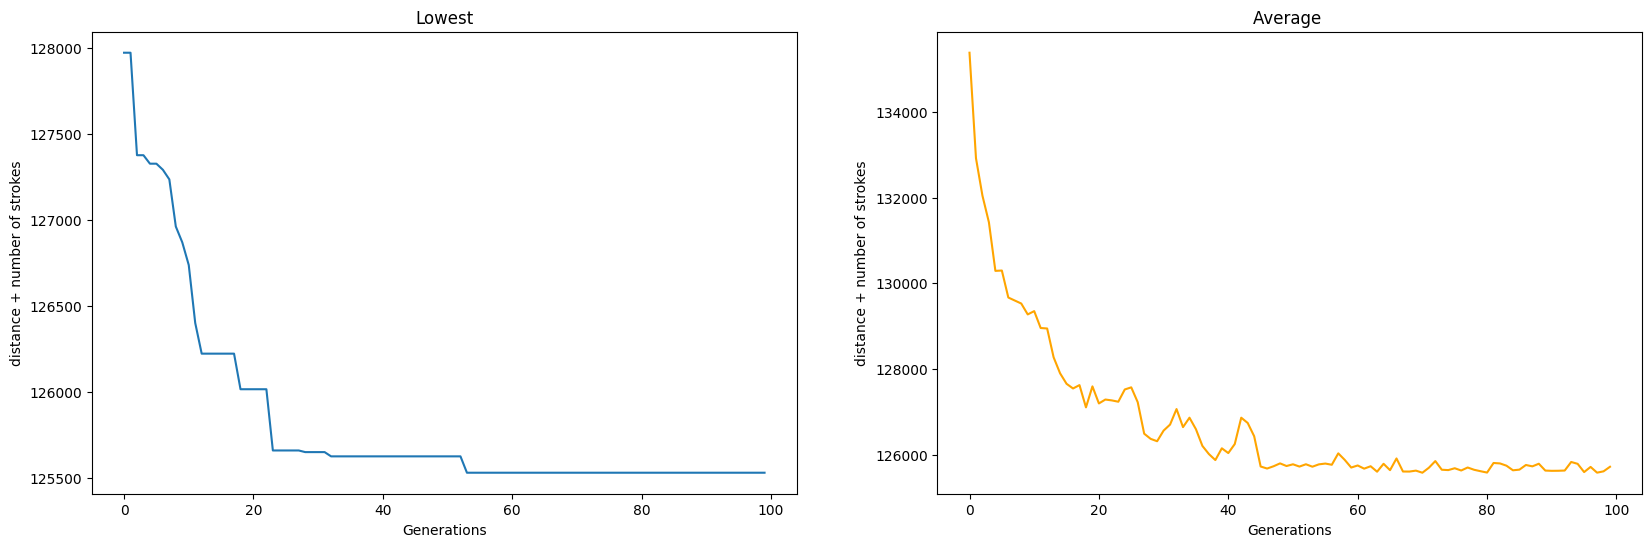

<Figure size 640x480 with 0 Axes>

In [3]:
with open('learning.json') as fp:
    learning = json.load(fp)
    
last_dist = 1000000000
min_dists = []
avg_dists = []
generations = len(learning['generations'])

for i in range(0, generations):
    min_dist = learning['generations'][str(i)]['min']
    avg_dist = learning['generations'][str(i)]['avg']
    min_dists.append(min_dist)
    avg_dists.append(avg_dist)
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].plot(min_dists, label='Lowest')
axes[0].set_xlabel('Generations')
axes[0].set_ylabel('distance + number of strokes')
axes[0].set_title('Lowest')

axes[1].plot(avg_dists, label='Average ', color='orange')
axes[1].set_xlabel('Generations')
axes[1].set_ylabel('distance + number of strokes')
axes[1].set_title('Average ')

plt.show()
plt.savefig('한손 최적화.png')